# Graduate Rotational Internship Program

# The Sparks Foundation

# Name =V S Koundinya

## Prediction using Supervised ML

## prediction of student percentage based on hours

In [1]:
#Importing required libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
student_data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Analysis

In [2]:
#To get top 10 rows
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# To get information in sheet
student_data.info()
#To get shape
student_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


(25, 2)

In [4]:
student_data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#Describing the data
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualization

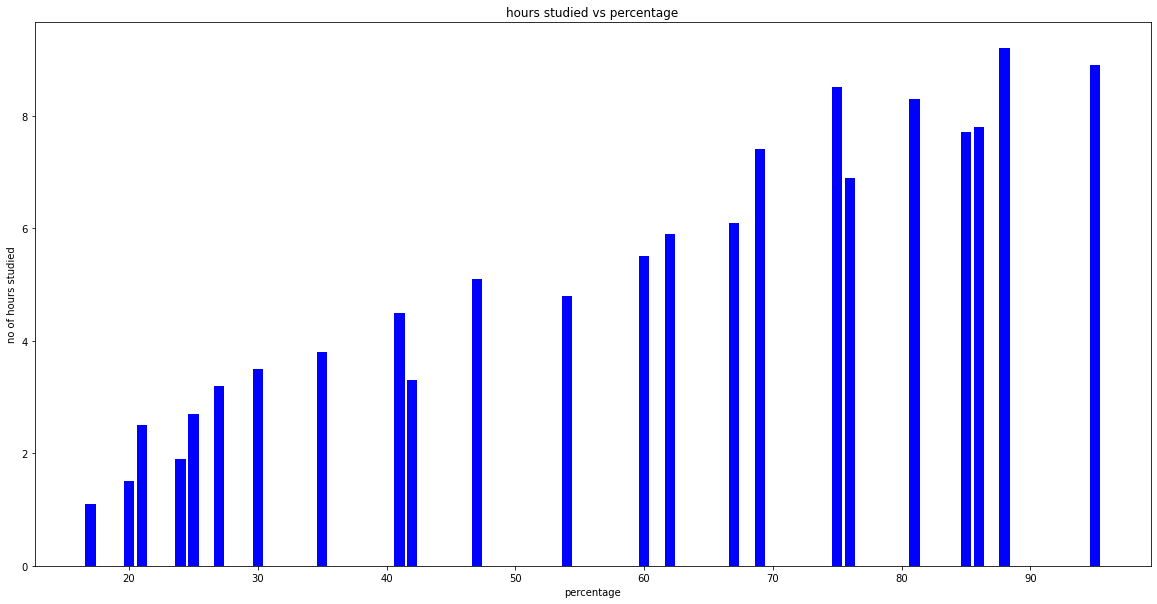

In [13]:
#Bargraph
y=student_data["Hours"]
x=student_data["Scores"]

plt.figure(figsize=(20,10))
plt.bar(x,y,color="b")
plt.ylabel("no of hours studied")
plt.xlabel("percentage")
plt.title("hours studied vs percentage")
plt.show()

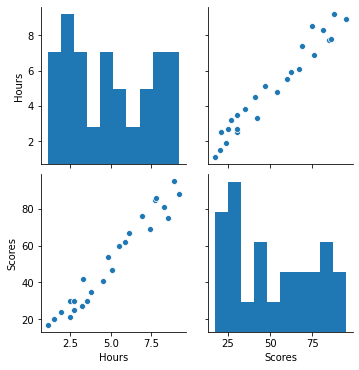

In [65]:
#Pairplot
import seaborn as sns
sns.pairplot(student_data)

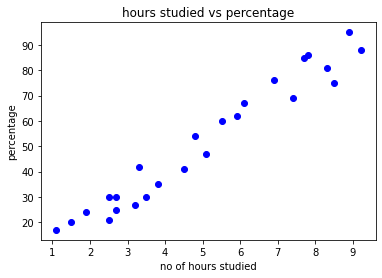

In [7]:
# Relation between marks & studyhours can be seen in below scatterplot
plt.xlabel("no of hours studied")
plt.ylabel("percentage")
plt.title("hours studied vs percentage")
plt.scatter(x,y,color="b")
plt.show()


## Correlation

In [8]:
#correlation
correlation_data=student_data.corr()
correlation_data

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


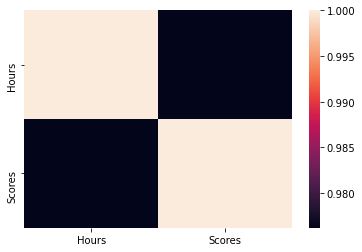

In [66]:
#Correlation graph
sns.heatmap(student_data.corr())

## Splitting Data

In [46]:
#This block of code is used to read the csv file in which the data is stored
x=student_data.iloc[:,0].values
y=student_data.iloc[:,1].values

In [67]:
#Converting 1d array into 2d array
X=x.reshape(-1,1)


In [50]:
#Now what we have to do is split the train and test data. 
#Here test_size represents the data that we want for testing and rest is used for training.
#Random_state is used for producing same set of train and test data points, for each split.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5) 

## Creating a Model

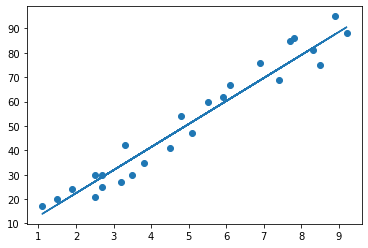

In [73]:
#It creates a Linearregression model
from sklearn.linear_model import LinearRegression  
lm=LinearRegression() 
model=lm.fit(X_train,y_train)
line = lm.coef_*X+lm.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions 


In [74]:
pred=lm.predict(X_test)

In [69]:
#Created model is evaluted by displaying dataframe containing predicted & original values.
df=pd.DataFrame(pred,y_test)
df

,0
69,73.471066
67,61.181532
27,33.766416
85,76.307113
54,48.891997
24,21.476882
86,77.252461
41,46.055951


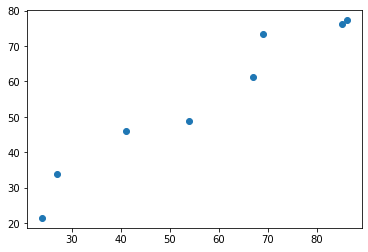

In [54]:
# Plotting the predicted & original values
plt.scatter(y_test,pred)
plt.xlabel("y_test")
plt.ylabel("pred")

## Evaluting the model

In [62]:
#Calculating mean square error
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred)
mse

38.71694720790297

In [71]:
#Calculating r2 score
r2=r2_score(y_test,pred)
r2

0.9248556597026296